<a href="https://colab.research.google.com/github/vanviethieuanh/CS114.L21/blob/main/Predict_the_final_score_of_students_IT001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. DATA DISCOVER


+ Lấy dữ liệu từ file

In [ ]:
import pandas as pd
df_x = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predict_the_final_score_of_students_IT001/wecode.csv')
df_y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predict_the_final_score_of_students_IT001/score_training.csv')

+ Lấy ra những dữ liệu cần thiết

In [ ]:
import numpy as np
X = np.array([df_x['user_id'], df_x['problem_id'], df_x['pre_score'],df_x['is_final'], df_x['coefficient'], df_x['status']]).T
y_train = np.array([df_y['id'], df_y['CK']]).T

In [ ]:
print(X)
print(y_train)

[[4 3 10000 1 '100' 'SCORE']
 [4 4 10000 1 '100' 'SCORE']
 [4 5 0 0 '100' 'Compilation Error']
 ...
 [1796 25 10000 1 '100' 'SCORE']
 [255 150 6250 1 '100' 'SCORE']
 [1568 24 10000 0 '100' 'SCORE']]
[[22 '8.5']
 [24 '9.5']
 [27 '10']
 ...
 [1862 '7.5']
 [1865 '7.5']
 [1866 '5']]


In [ ]:
# Lấy ra user_id của học sinh
arr_id = []
for i in range(len(X)):
  arr_id.append(X[i][0])
arr_id = list(set(arr_id))
print(arr_id)

[1, 4, 5, 6, 7, 11, 14, 15, 20, 24, 27, 29, 31, 34, 35, 37, 40, 41, 42, 43, 45, 47, 48, 49, 51, 52, 53, 55, 57, 59, 64, 65, 67, 68, 69, 70, 72, 76, 77, 80, 83, 85, 87, 88, 89, 90, 91, 93, 94, 96, 97, 98, 101, 102, 103, 104, 105, 109, 114, 116, 119, 122, 124, 125, 126, 131, 133, 135, 140, 141, 143, 145, 146, 148, 149, 150, 158, 160, 161, 163, 164, 165, 166, 167, 170, 171, 175, 179, 180, 181, 182, 184, 185, 187, 188, 189, 190, 193, 194, 195, 198, 199, 200, 202, 204, 205, 206, 207, 213, 215, 216, 219, 222, 224, 226, 232, 234, 236, 237, 238, 239, 240, 242, 245, 247, 248, 249, 250, 251, 252, 254, 255, 256, 263, 264, 265, 267, 269, 270, 272, 273, 274, 276, 279, 281, 283, 284, 285, 287, 289, 291, 292, 296, 299, 300, 303, 304, 306, 307, 309, 310, 311, 312, 317, 321, 322, 326, 327, 330, 332, 334, 339, 340, 341, 343, 344, 345, 346, 347, 348, 353, 355, 361, 362, 363, 365, 368, 372, 373, 374, 375, 376, 379, 380, 381, 386, 387, 388, 391, 393, 394, 395, 396, 397, 398, 399, 400, 402, 403, 404, 405, 4

In [ ]:
# Lấy ra dự liệu hoạt động của từng học sinh
arr_students = []
for i in range(len(arr_id)):
  arr_student = []
  for j in range(len(X)):
    if X[j][0] == arr_id[i]:
      arr_student.append(X[j])
  arr_students.append(arr_student)

In [ ]:
print(np.array(arr_students[1]))

[[4 3 10000 1 '100' 'SCORE']
 [4 4 10000 1 '100' 'SCORE']
 [4 5 0 0 '100' 'Compilation Error']
 [4 5 0 0 '100' 'Compilation Error']
 [4 5 0 0 '100' 'Compilation Error']
 [4 5 0 0 '100' 'Compilation Error']
 [4 6 10000 1 '100' 'SCORE']
 [4 7 10000 1 '100' 'SCORE']
 [4 8 10000 1 '100' 'SCORE']
 [4 9 10000 1 '100' 'SCORE']
 [4 5 10000 1 '100' 'SCORE']
 [4 81 0 1 '100' 'SCORE']
 [4 101 10000 1 '100' 'SCORE']
 [4 101 10000 0 '100' 'SCORE']
 [4 104 10000 1 '100' 'SCORE']
 [4 106 10000 1 '100' 'SCORE']
 [4 107 10000 1 '100' 'SCORE']
 [4 108 10000 1 '100' 'SCORE']
 [4 109 10000 1 '100' 'SCORE']
 [4 110 10000 1 '100' 'SCORE']
 [4 111 10000 1 '100' 'SCORE']
 [4 111 10000 0 '100' 'SCORE']
 [4 112 10000 0 '100' 'SCORE']
 [4 117 10000 1 '100' 'SCORE']
 [4 118 0 0 '100' 'Compilation Error']
 [4 118 10000 1 '100' 'SCORE']
 [4 119 10000 1 '100' 'SCORE']
 [4 121 10000 1 '100' 'SCORE']
 [4 123 10000 1 '100' 'SCORE']
 [4 131 10000 1 '100' 'SCORE']
 [4 132 10000 1 '100' 'SCORE']
 [4 133 10000 1 '100' 'SCO

**CÁC ĐẶC TRƯNG CẦN LẤY Ở BỘ DỮ LIỆU CỦA TỪNG HỌC SINH:**
  - Số bài hoàn thành.
  - Số bài nộp trung bình trên mỗi bài làm.
  - Số lần Compilation Error.
  - Số coefficient trung bình.
  - Tổng số điểm


In [ ]:
# CÁC ĐẶC TRƯNG CẦN LẤY Ở BỘ DỮ LIỆU CỦA TỪNG HỌC SINH:
def features(arr_student):
  # Tổng số tasks hoàn thành
  sum_tasks = 0

  # Tổng số bài final submissions
  sum_final_submissions = 0

  # Tổng số compilation error
  sum_compilation_error = 0

  # Tổng số coefficient
  sum_coefficient = 0

  # Tổng số score
  sum_score = 0

  for i in range(len(arr_student)):
    # Lấy số bài hoàn thành của từng học sinh:
    if arr_student[i][2] == 10000 and arr_student[i][3] == 1:
      sum_tasks += 1

    # Lấy số bài nộp trung bình trên mỗi bài làm:
    if arr_student[i][3] == 1:
      sum_final_submissions += 1

    # Lấy tổng số lần Compilation Error
    if arr_student[i][5] == 'Compilation Error':
      sum_compilation_error += 1
    
    # Lấy số coefficient trung bình:
    if arr_student[i][4] != 'error':
      sum_coefficient += int(arr_student[i][4])

    # Lấy tổng số điểm của từng học sinh:
    if arr_student[i][3] == 1:
      sum_score += arr_student[i][2]
  
  if sum_final_submissions == 0:
    avg_submissions = 0
  else:
    avg_submissions = round(len(arr_student) / sum_final_submissions, 4)
  if len(arr_student) == 0:
    avg_coefficients = 0
  else:
    avg_coefficients = round(sum_coefficient / len(arr_student), 4)
  return sum_tasks, avg_submissions, sum_compilation_error, avg_coefficients, sum_score

**Lưu dataset cần training vào file csv**

In [ ]:
# Lấy dữ liệu X (training and testing)
arr_temp_datasets = list()
for i in range(len(arr_students)):
  sum_tasks, avg_submissions, sum_compilation_error, avg_coefficients, sum_score = features(np.array(arr_students[i]))
  arr_temp = [arr_id[i], sum_tasks, avg_submissions, sum_compilation_error, avg_coefficients, sum_score]
  arr_temp_datasets.append(arr_temp)

In [ ]:
# In ra bộ dataset tạm thời
print(arr_temp_datasets)

[[1, 1, 1.0, 1, 100.0, 10000], [4, 37, 1.4211, 6, 100.0, 370000], [5, 3, 1.2, 2, 100.0, 30000], [6, 85, 1.4773, 25, 100.0, 850000], [7, 0, 2.5, 0, 100.0, 9209], [11, 9, 4.1667, 7, 100.4, 100316], [14, 6, 3.1429, 2, 100.0, 68000], [15, 45, 1.9423, 25, 100.0, 458666], [20, 12, 1.0833, 1, 100.0, 120000], [24, 72, 2.1299, 33, 100.0, 750299], [27, 3, 2.6, 0, 100.0, 39000], [29, 72, 2.4875, 28, 100.0, 762760], [31, 3, 4.3333, 0, 100.0, 30000], [34, 81, 2.5952, 16, 100.0, 822888], [35, 145, 1.9669, 51, 100.0, 1477000], [37, 93, 3.0588, 62, 100.0, 979712], [40, 207, 3.0884, 112, 88.7048, 2111388], [41, 61, 1.5493, 5, 100.0, 636888], [42, 191, 1.6701, 34, 100.0, 1925142], [43, 148, 2.8176, 118, 100.0, 1541357], [45, 55, 2.403, 24, 100.0, 601388], [47, 66, 2.7761, 42, 100.0, 666000], [48, 19, 1.04, 3, 100.0, 225285], [49, 97, 3.1616, 126, 100.0, 984602], [51, 38, 2.2051, 27, 100.0, 380000], [52, 95, 3.49, 66, 100.0, 973888], [53, 105, 3.1008, 123, 83.5, 1159627], [55, 81, 2.4186, 62, 100.0, 8278

In [ ]:
# Lưu dataset X vào csv
from pandas import DataFrame
arr_temp = np.array(arr_temp_datasets).T
data_temp = {
    'user_id':arr_temp[0],
    'sum_tasks':arr_temp[1],
    'avg_submissions':arr_temp[2],
    'sum_compilation_error':arr_temp[3],
    'avg_coefficients':arr_temp[4],
    'sum_score':arr_temp[5]
}
df = DataFrame(data_temp, columns= ['user_id', 'sum_tasks', 'avg_submissions', 'sum_compilation_error', 'avg_coefficients', 'sum_score'])
export_csv = df.to_csv (r'/content/drive/MyDrive/Colab Notebooks/Predict_the_final_score_of_students_IT001/data_0.csv', index = None, header=True)
print(df)

      user_id  sum_tasks  ...  avg_coefficients  sum_score
0         1.0        1.0  ...             100.0    10000.0
1         4.0       37.0  ...             100.0   370000.0
2         5.0        3.0  ...             100.0    30000.0
3         6.0       85.0  ...             100.0   850000.0
4         7.0        0.0  ...             100.0     9209.0
...       ...        ...  ...               ...        ...
1154   1860.0       28.0  ...             100.0   329665.0
1155   1862.0        4.0  ...             100.0    40000.0
1156   1864.0       28.0  ...             100.0   439741.0
1157   1865.0       10.0  ...             100.0   116428.0
1158   1868.0       27.0  ...             100.0   270000.0

[1159 rows x 6 columns]


**Chia bộ data tạm thời thành bộ data training và bộ testing**

In [ ]:
# Lấy dự liệu từ file data_0.csv
import pandas as pd
import numpy as np
df_X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predict_the_final_score_of_students_IT001/data_0.csv')
input_X = np.array([df_X['user_id'],df_X['sum_tasks'],df_X['avg_submissions'],df_X['sum_compilation_error'],df_X['avg_coefficients'],df_X['sum_score']]).T
print(input_X)

[[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+02 1.00000e+04]
 [4.00000e+00 3.70000e+01 1.42110e+00 6.00000e+00 1.00000e+02 3.70000e+05]
 [5.00000e+00 3.00000e+00 1.20000e+00 2.00000e+00 1.00000e+02 3.00000e+04]
 ...
 [1.86400e+03 2.80000e+01 2.96830e+00 5.50000e+01 1.00000e+02 4.39741e+05]
 [1.86500e+03 1.00000e+01 5.82350e+00 4.00000e+01 1.00000e+02 1.16428e+05]
 [1.86800e+03 2.70000e+01 1.74070e+00 0.00000e+00 1.00000e+02 2.70000e+05]]


In [ ]:
print('y_training: \n',y_train)
y_train = list(y_train)
n = len(y_train)
i = 0
while(n != i):
  if y_train[i][1] == 'nan' or y_train[i][1] == '\xa0' or y_train[i][0] == 51:
    y_train.pop(i)
    n -= 1
  else:
    i += 1 

y_training: 
 [array([22, '8.5'], dtype=object), array([24, '9.5'], dtype=object), array([27, '10'], dtype=object), array([28, '9.5'], dtype=object), array([29, '8.5'], dtype=object), array([30, '9'], dtype=object), array([34, '6.5'], dtype=object), array([35, '4.5'], dtype=object), array([36, '7'], dtype=object), array([37, '7.5'], dtype=object), array([40, '8'], dtype=object), array([41, '8'], dtype=object), array([42, '7.5'], dtype=object), array([43, '6'], dtype=object), array([44, '5'], dtype=object), array([45, '7.5'], dtype=object), array([47, '4'], dtype=object), array([48, '3'], dtype=object), array([49, '5.5'], dtype=object), array([52, '4.5'], dtype=object), array([53, '6'], dtype=object), array([54, '6'], dtype=object), array([55, '4.5'], dtype=object), array([57, '8'], dtype=object), array([58, '7'], dtype=object), array([59, '6.5'], dtype=object), array([62, '4.5'], dtype=object), array([64, '9'], dtype=object), array([66, '9.5'], dtype=object), array([67, '5.5'], dtype=o

In [ ]:

X_training = []
X_testing = []
temp_X = list(input_X)
for i in range(len(y_train)):
  while(len(temp_X)!=0):
    j = 0
    if int(y_train[i][0]) == int(temp_X[j][0]):
      temp = list(temp_X[j])
      temp.extend([y_train[i][1]])
      X_training.append(temp)
      temp_X.pop(j)
      break
    elif int(y_train[i][0]) < int(temp_X[j][0]):
      break
    else:
      X_testing.append(temp_X[j])
      temp_X.pop(j)

In [ ]:
# In ra dự liêu training và dữ liệu predict
print(np.array(X_training))
print(np.array(X_testing))

[['24.0' '72.0' '2.1299' ... '100.0' '750299.0' '9.5']
 ['27.0' '3.0' '2.6' ... '100.0' '39000.0' '10']
 ['29.0' '72.0' '2.4875' ... '100.0' '762760.0' '8.5']
 ...
 ['1859.0' '3.0' '1.0333' ... '100.0' '39000.0' '1.5']
 ['1862.0' '4.0' '2.0' ... '100.0' '40000.0' '7.5']
 ['1865.0' '10.0' '5.8235' ... '100.0' '116428.0' '7.5']]
[[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+02 1.00000e+04]
 [4.00000e+00 3.70000e+01 1.42110e+00 6.00000e+00 1.00000e+02 3.70000e+05]
 [5.00000e+00 3.00000e+00 1.20000e+00 2.00000e+00 1.00000e+02 3.00000e+04]
 ...
 [1.85500e+03 6.30000e+01 2.00000e+00 1.10000e+01 1.00000e+02 6.49000e+05]
 [1.86000e+03 2.80000e+01 1.58330e+00 1.00000e+01 1.00000e+02 3.29665e+05]
 [1.86400e+03 2.80000e+01 2.96830e+00 5.50000e+01 1.00000e+02 4.39741e+05]]


In [ ]:
# Lưu dataset training sets vào csv
from pandas import DataFrame
arr_temp = np.array(X_training).T
data_training_set = {
    'user_id':arr_temp[0],
    'sum_tasks':arr_temp[1],
    'avg_submissions':arr_temp[2],
    'sum_compilation_error':arr_temp[3],
    'avg_coefficients':arr_temp[4],
    'sum_score':arr_temp[5],
    'CK_score':arr_temp[6]
}
df = DataFrame(data_training_set, columns= ['user_id', 'sum_tasks', 'avg_submissions', 'sum_compilation_error', 'avg_coefficients', 'sum_score', 'CK_score'])
export_csv = df.to_csv (r'/content/drive/MyDrive/Colab Notebooks/Predict_the_final_score_of_students_IT001/data_training.csv', index = None, header=True)
print(df)

    user_id sum_tasks avg_submissions  ... avg_coefficients  sum_score CK_score
0      24.0      72.0          2.1299  ...            100.0   750299.0      9.5
1      27.0       3.0             2.6  ...            100.0    39000.0       10
2      29.0      72.0          2.4875  ...            100.0   762760.0      8.5
3      34.0      81.0          2.5952  ...            100.0   822888.0      6.5
4      35.0     145.0          1.9669  ...            100.0  1477000.0      4.5
..      ...       ...             ...  ...              ...        ...      ...
801  1856.0      23.0          2.0645  ...            100.0   270790.0      7.5
802  1857.0      37.0           1.375  ...            100.0   386000.0        4
803  1859.0       3.0          1.0333  ...            100.0    39000.0      1.5
804  1862.0       4.0             2.0  ...            100.0    40000.0      7.5
805  1865.0      10.0          5.8235  ...            100.0   116428.0      7.5

[806 rows x 7 columns]


In [ ]:
# Lưu dataset testing sets vào csv
from pandas import DataFrame
arr_temp = np.array(X_testing).T
data_testing_set = {
    'user_id':arr_temp[0],
    'sum_tasks':arr_temp[1],
    'avg_submissions':arr_temp[2],
    'sum_compilation_error':arr_temp[3],
    'avg_coefficients':arr_temp[4],
    'sum_score':arr_temp[5]
}
df = DataFrame(data_testing_set, columns= ['user_id', 'sum_tasks', 'avg_submissions', 'sum_compilation_error', 'avg_coefficients', 'sum_score'])
export_csv = df.to_csv (r'/content/drive/MyDrive/Colab Notebooks/Predict_the_final_score_of_students_IT001/data_testing.csv', index = None, header=True)
print(df)

In [ ]:
# Lấy dự liệu từ file data_training.csv
import pandas as pd
import numpy as np
df_training = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predict_the_final_score_of_students_IT001/data_training.csv')
X_training = np.array([df_training['sum_tasks'],df_training['avg_submissions'],df_training['sum_compilation_error'],df_training['avg_coefficients'],df_training['sum_score']]).T
y_training = np.array(df_training['CK_score']).T
print('X_training: \n', X_training)
print('y_training: \n', y_training)

# Lấy dữ liệu từ file data_testing.csv
df_testing = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Predict_the_final_score_of_students_IT001/data_testing.csv')
X_testing = np.array([df_testing['sum_tasks'],df_testing['avg_submissions'],df_testing['sum_compilation_error'],df_testing['avg_coefficients'],df_testing['sum_score']]).T

print('X_testing: \n', X_testing)

X_training: 
 [[7.20000e+01 2.12990e+00 3.30000e+01 1.00000e+02 7.50299e+05]
 [3.00000e+00 2.60000e+00 0.00000e+00 1.00000e+02 3.90000e+04]
 [7.20000e+01 2.48750e+00 2.80000e+01 1.00000e+02 7.62760e+05]
 ...
 [3.00000e+00 1.03330e+00 9.00000e+00 1.00000e+02 3.90000e+04]
 [4.00000e+00 2.00000e+00 4.00000e+00 1.00000e+02 4.00000e+04]
 [1.00000e+01 5.82350e+00 4.00000e+01 1.00000e+02 1.16428e+05]]
y_training: 
 [ 9.5 10.   8.5  6.5  4.5  7.5  8.   8.   7.5  6.   7.5  4.   3.   5.5
  4.5  6.   4.5  8.   6.5  9.   5.5  9.   6.   2.   7.5  0.   8.5  8.5
  3.5  9.   7.5  3.5  6.   7.5  5.5  6.   8.   5.   5.5  7.   9.   7.
  8.   5.5  9.   5.5  9.5  8.   7.   7.   9.   4.5  4.5  4.5  6.   0.
  8.   7.   4.   0.   7.5  6.   0.   7.5  9.   8.   5.5  6.5  5.5  6.5
  4.   5.5  4.5  5.5  1.5  6.5  7.   4.5  9.5  7.5  8.5  6.5  8.   6.5
  9.   7.5  0.   8.   7.   7.   4.   4.5  4.   8.   2.5  9.   4.5  0.
  8.   8.5  7.5  8.5  6.5  5.   9.   6.   8.   9.5  7.   6.5  2.5  8.
  7.5  4.5  6.   6.   3.

In [ ]:
import numpy as np 

# Building Xbar 
one = np.ones((X_training.shape[0], 1))
Xbar = np.concatenate((one, X_training), axis = 1)
print('Xbar: ', Xbar)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
print('A: ', A)
b = np.dot(Xbar.T, y_training)
print('b: ', b)
w = np.dot(np.linalg.pinv(A), b)
print('w: ', w)


Xbar:  [[1.00000e+00 7.20000e+01 2.12990e+00 3.30000e+01 1.00000e+02 7.50299e+05]
 [1.00000e+00 3.00000e+00 2.60000e+00 0.00000e+00 1.00000e+02 3.90000e+04]
 [1.00000e+00 7.20000e+01 2.48750e+00 2.80000e+01 1.00000e+02 7.62760e+05]
 ...
 [1.00000e+00 3.00000e+00 1.03330e+00 9.00000e+00 1.00000e+02 3.90000e+04]
 [1.00000e+00 4.00000e+00 2.00000e+00 4.00000e+00 1.00000e+02 4.00000e+04]
 [1.00000e+00 1.00000e+01 5.82350e+00 4.00000e+01 1.00000e+02 1.16428e+05]]
A:  [[8.06000000e+02 6.98660000e+04 2.09088620e+03 3.44470000e+04
  7.96907613e+04 7.20117300e+08]
 [6.98660000e+04 8.30692400e+06 1.78743931e+05 3.72107100e+06
  6.90457099e+06 8.53451886e+10]
 [2.09088620e+03 1.78743931e+05 6.41883955e+03 1.01982557e+05
  2.06327807e+05 1.84408711e+09]
 [3.44470000e+04 3.72107100e+06 1.01982557e+05 2.37154300e+06
  3.39605693e+06 3.83147103e+10]
 [7.96907613e+04 6.90457099e+06 2.06327807e+05 3.39605693e+06
  7.89302331e+06 7.11562441e+10]
 [7.20117300e+08 8.53451886e+10 1.84408711e+09 3.83147103e

In [ ]:
# Hàm dự đoán
def predict(x_testing, w):
  y = x_testing * np.array(w).T
  return y

In [ ]:
# Hàm testing
def testing(arr_data_testing, w):
  arr_y = []
  for i in range(len(arr_data_testing)):
    arr_y.append(predict(arr_data_testing[i], w))
  return arr_y

In [ ]:
arr_y = testing(Xbar, w)
print(arr_y)

In [ ]:
print(Xbar[1])
print(w.reshape(-1, 1))
y = Xbar[0].dot(w.reshape(-1, 1))
print(y)

[1.0e+00 3.0e+00 2.6e+00 0.0e+00 1.0e+02 3.9e+04]
[[ 4.43047361e+00]
 [-6.82253427e-02]
 [ 6.16298576e-01]
 [-2.16768209e-02]
 [-8.34858019e-03]
 [ 8.74033444e-06]]
[5.83857435]


In [ ]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y_training)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)

Solution found by scikit-learn  :  [ 4.43047204e+00 -6.82253454e-02  6.16298588e-01 -2.16768209e-02
 -8.34856477e-03  8.74033472e-06]
Solution found by (5):  [ 4.43047361e+00 -6.82253427e-02  6.16298576e-01 -2.16768209e-02
 -8.34858019e-03  8.74033444e-06]


In [ ]:
regr.predict(np.array([Xbar[590]]))

array([6.18758302])

In [ ]:
regr.score(Xbar, y_training)

0.18644743054758306

**TEST VUI THÔI**

In [ ]:
x0 = X_training.T
print(x0)

[[7.20000e+01 3.00000e+00 7.20000e+01 ... 3.00000e+00 4.00000e+00
  1.00000e+01]
 [2.12990e+00 2.60000e+00 2.48750e+00 ... 1.03330e+00 2.00000e+00
  5.82350e+00]
 [3.30000e+01 0.00000e+00 2.80000e+01 ... 9.00000e+00 4.00000e+00
  4.00000e+01]
 [1.00000e+02 1.00000e+02 1.00000e+02 ... 1.00000e+02 1.00000e+02
  1.00000e+02]
 [7.50299e+05 3.90000e+04 7.62760e+05 ... 3.90000e+04 4.00000e+04
  1.16428e+05]]


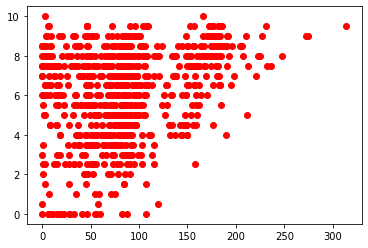

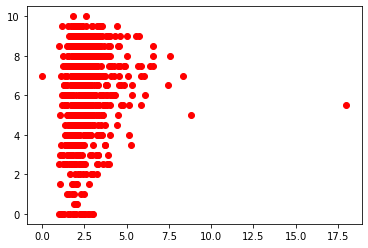

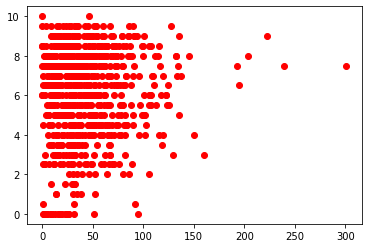

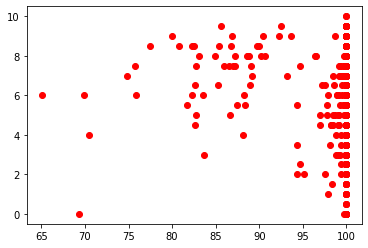

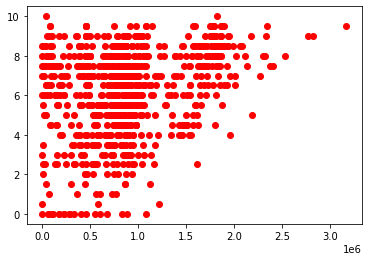

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x0[0], y_training, 'ro')
plt.show()
plt.plot(x0[1], y_training, 'ro')
plt.show()
plt.plot(x0[2], y_training, 'ro')
plt.show()
plt.plot(x0[3], y_training, 'ro')
plt.show()
plt.plot(x0[4], y_training, 'ro')
plt.show()